In [1]:
from watermodelCLASS import WaterModel
from calibratorCLASS import Calibrator
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import time
import numpy as np
import geopandas as gpd

In [22]:
DATA_DIR = "/Users/rileyluck/Documents/SS_2025/ALSM/data/"
OUPTUT_DIR = "/Users/rileyluck/Documents/SS_2025/ALSM/output/"

In [20]:
data_path = "/Users/rileyluck/Documents/SS_2025/ALSM/data/"
output_path = "/Users/rileyluck/Documents/SS_2025/ALSM/output/"


temperature = xr.open_mfdataset(data_path + 'daily_average_temperature/*.nc', combine='by_coords').load()
precipitation = xr.open_mfdataset(data_path + 'total_precipitation/*.nc', combine='by_coords').load()
radiation = xr.open_mfdataset(data_path + 'net_radiation/*.nc', combine='by_coords').load()
lai = xr.open_mfdataset(data_path + 'lai_full/*.nc', combine='by_coords').load()

data = xr.Dataset()
data['temperature'] = temperature['t2m']
data['precipitation'] = precipitation['tp']
data['radiation'] = radiation['nr']
data['lai'] = lai['lai']

#get rid of anythin before 2002 and after 2023
data = data.sel(time=slice('2000-01-01', '2023-12-31'))

In [7]:

params = [420, 8, 0.2, 0.8, 1.5, (0.75, 0.25)]
wm = WaterModel(params, data)
results = wm.run_simulation()

Loading data...


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U30')) -> None

Creating results plot...


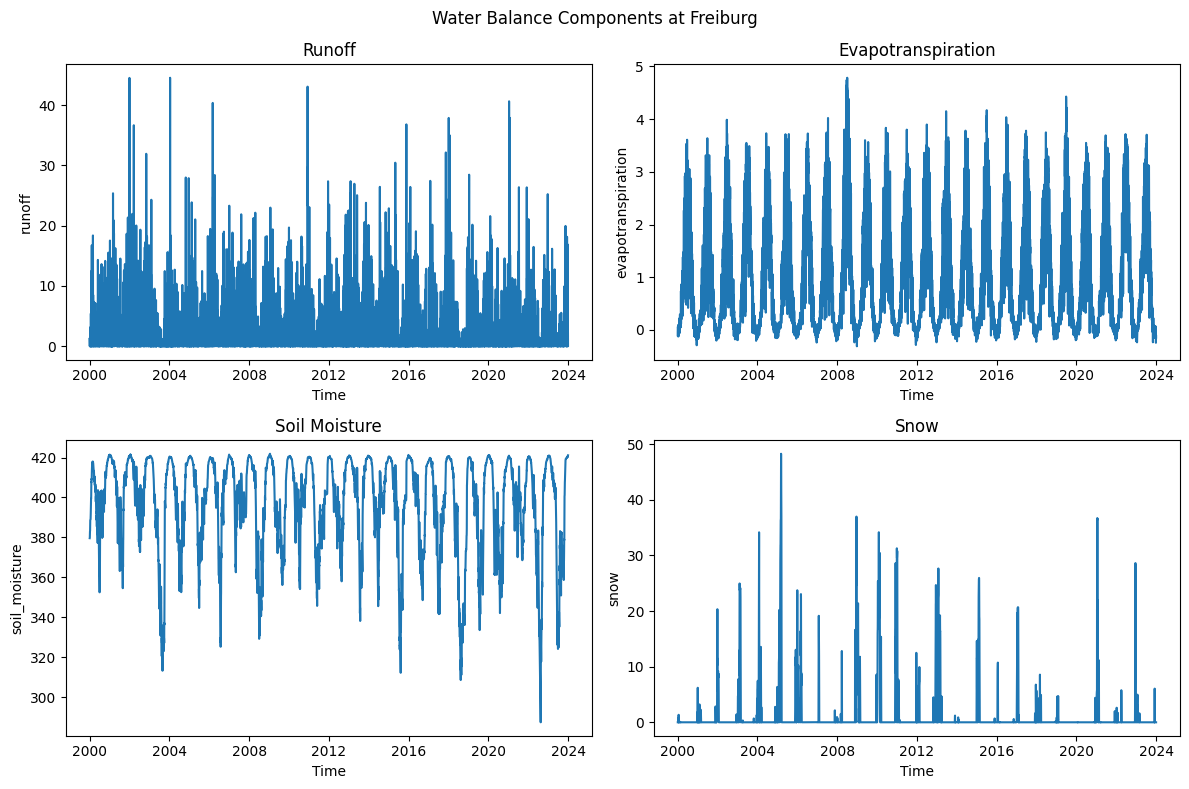

In [ ]:
def create_results_plot(res):
    print('Creating results plot...')
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    res_freiburg = res.sel(lat=47.999, lon=7.845, method='nearest')
    res_freiburg['runoff'].plot(ax=axs[0, 0], label='Runoff')
    res_freiburg['evapotranspiration'].plot(ax=axs[0, 1], label='Evapotranspiration')
    res_freiburg['soil_moisture'].plot(ax=axs[1, 0], label='Soil Moisture')
    res_freiburg['snow'].plot(ax=axs[1, 1], label='Snow')
    axs[0, 0].set_title('Runoff')
    axs[0, 1].set_title('Evapotranspiration')
    axs[1, 0].set_title('Soil Moisture')
    axs[1, 1].set_title('Snow')
    for ax in axs.flat:
        ax.set_xlabel('Time')
    plt.suptitle('Water Balance Components at Freiburg')
    plt.tight_layout()
create_results_plot(results)

In [2]:
paramsChoice = {    
    "c_s": [210, 420, 840],
    "alpha": [2, 4, 8],
    "gamma": [0.2, 0.5, 0.8],
    "beta": [0.4, 0.6, 0.8],
    "c_m": [1, 1.5, 2],
    "et_weight": [(0.5, 0.25), (0.75, 0.5), (0.5, 0.5)]
}


data_path = r"D:/OneDrive/Desktop/Landuse Modelling/Model Rene/data"
output_path = r"D:/OneDrive/Desktop/Landuse Modelling/Model Rene/output"


temperature = xr.open_mfdataset(data_path + '/daily_average_temperature/*.nc', combine='by_coords').load()
precipitation = xr.open_mfdataset(data_path + '/total_precipitation/*.nc', combine='by_coords').load()
radiation = xr.open_mfdataset(data_path + '/net_radiation/*.nc', combine='by_coords').load()
lai = xr.open_mfdataset(data_path + '/lai_full/*.nc', combine='by_coords').load()

data = xr.Dataset()
data['temperature'] = temperature['t2m']
data['precipitation'] = precipitation['tp']
data['radiation'] = radiation['nr']
data['lai'] = lai['lai']
data['observedRunoff'] = precipitation['tp']

#get rid of anythin before 2002 and after 2023
data = data.sel(time=slice('2000-01-01', '2023-12-31'))
#data = data.sel(lon=slice(7, 7.5), lat=slice(50, 50.5), method="nearest")
#data = data.sel(lat=47.9959, lon= 7.85222, method='nearest')

In [4]:
start_time = time.time()
cal = Calibrator(paramsChoice=paramsChoice, rasterData=data)
res = cal.calculate_best_params()
print(res)
apply_ufunc_duration = time.time() - start_time
print(f"calculations completed in {apply_ufunc_duration:.5f} seconds.")

<xarray.Dataset> Size: 27kB
Dimensions:  (lon: 22, lat: 22)
Coordinates:
  * lon      (lon) float64 176B 4.75 5.25 5.75 6.25 ... 13.75 14.25 14.75 15.25
  * lat      (lat) float64 176B 55.25 54.75 54.25 53.75 ... 45.75 45.25 44.75
Data variables:
    c_s      (lat, lon) float64 4kB nan nan nan nan ... 840.0 840.0 210.0 210.0
    alpha    (lat, lon) float64 4kB nan nan nan nan nan ... nan 4.0 2.0 2.0 4.0
    gamma    (lat, lon) float64 4kB nan nan nan nan nan ... nan 0.2 0.5 0.8 0.5
    beta     (lat, lon) float64 4kB nan nan nan nan nan ... nan 0.6 0.8 0.8 0.4
    c_m      (lat, lon) float64 4kB nan nan nan nan nan ... nan 1.5 2.0 2.0 1.5
    et1      (lat, lon) float64 4kB nan nan nan nan nan ... nan 0.5 0.5 0.5 0.5
    et2      (lat, lon) float64 4kB nan nan nan nan nan ... 0.25 0.25 0.5 0.25
calculations completed in 28.97200 seconds.


In [5]:
res

<xarray.Dataset> Size: 27kB
Dimensions:  (lon: 22, lat: 22)
Coordinates:
  * lon      (lon) float64 176B 4.75 5.25 5.75 6.25 ... 13.75 14.25 14.75 15.25
  * lat      (lat) float64 176B 55.25 54.75 54.25 53.75 ... 45.75 45.25 44.75
Data variables:
    c_s      (lat, lon) float64 4kB nan nan nan nan ... 840.0 840.0 210.0 210.0
    alpha    (lat, lon) float64 4kB nan nan nan nan nan ... nan 4.0 2.0 2.0 4.0
    gamma    (lat, lon) float64 4kB nan nan nan nan nan ... nan 0.2 0.5 0.8 0.5
    beta     (lat, lon) float64 4kB nan nan nan nan nan ... nan 0.6 0.8 0.8 0.4
    c_m      (lat, lon) float64 4kB nan nan nan nan nan ... nan 1.5 2.0 2.0 1.5
    et1      (lat, lon) float64 4kB nan nan nan nan nan ... nan 0.5 0.5 0.5 0.5
    et2      (lat, lon) float64 4kB nan nan nan nan nan ... 0.25 0.25 0.5 0.25

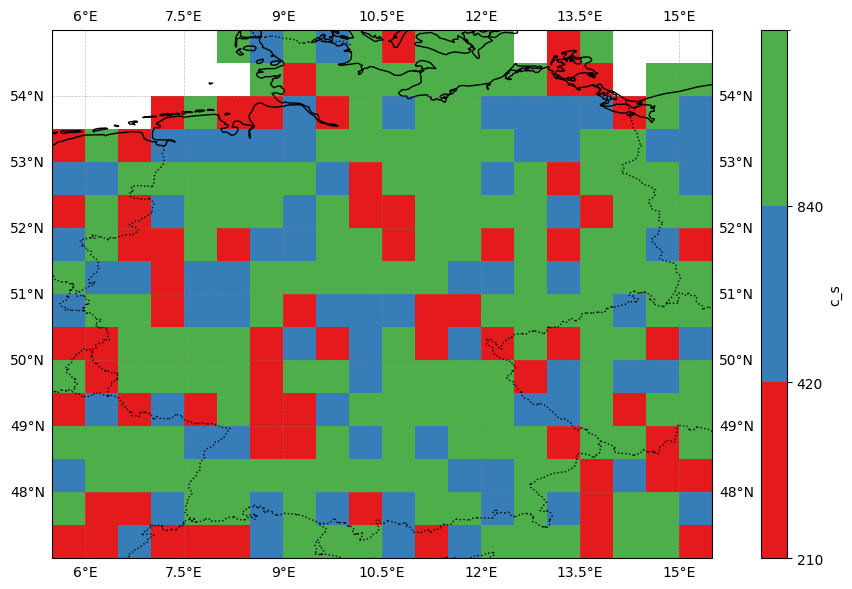

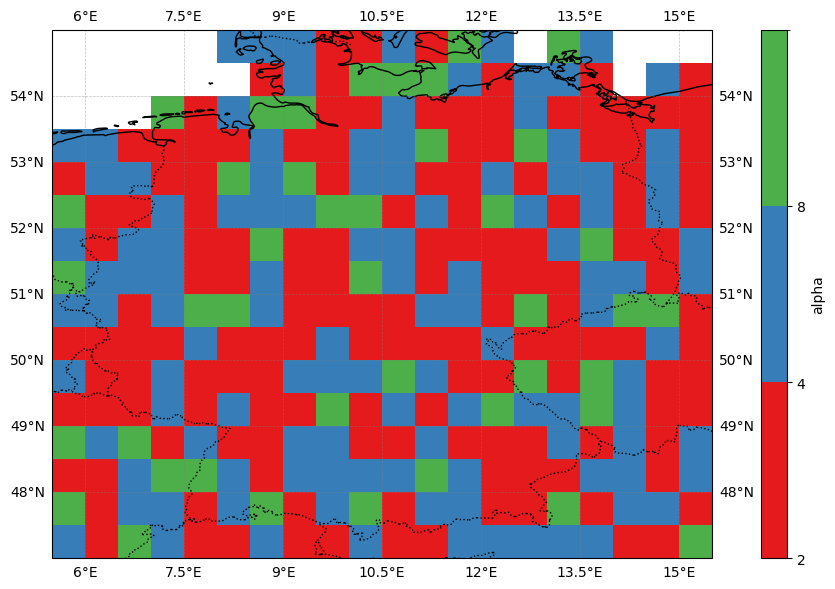

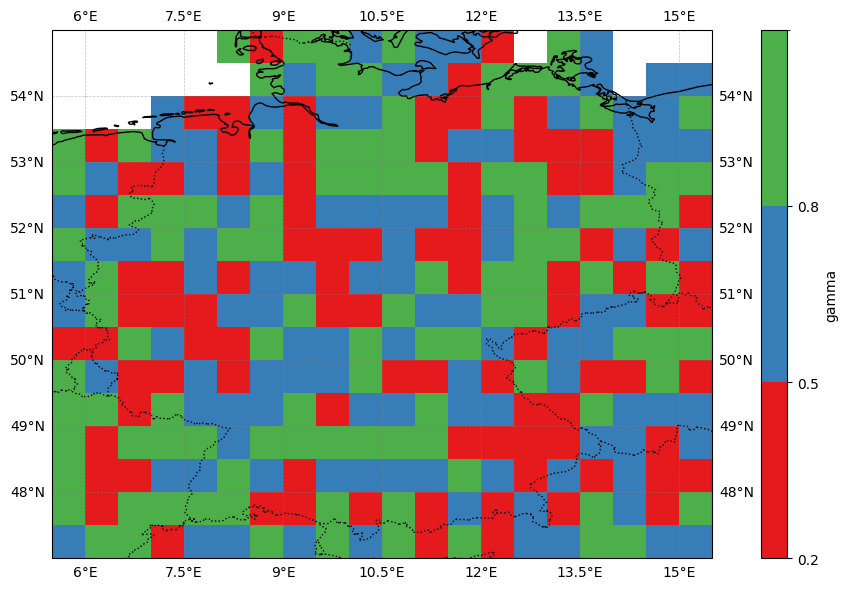

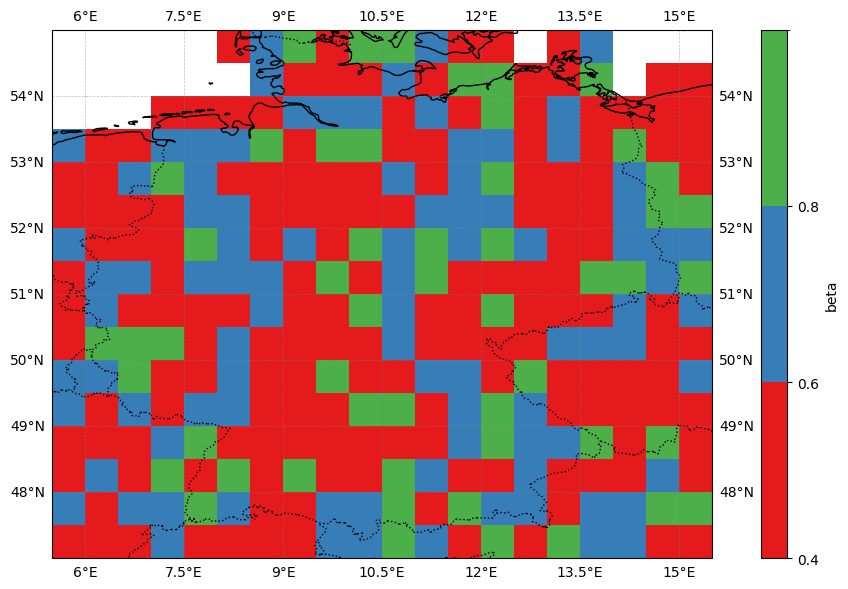

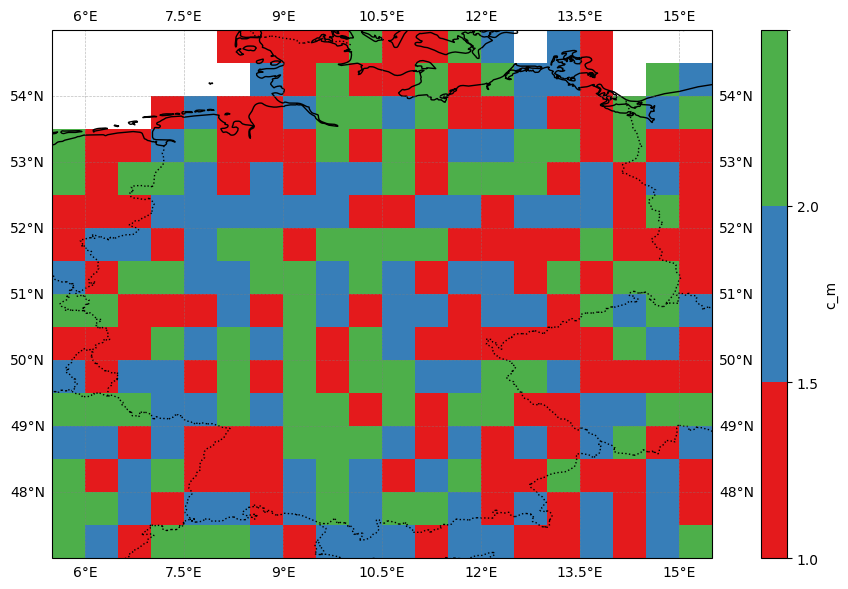

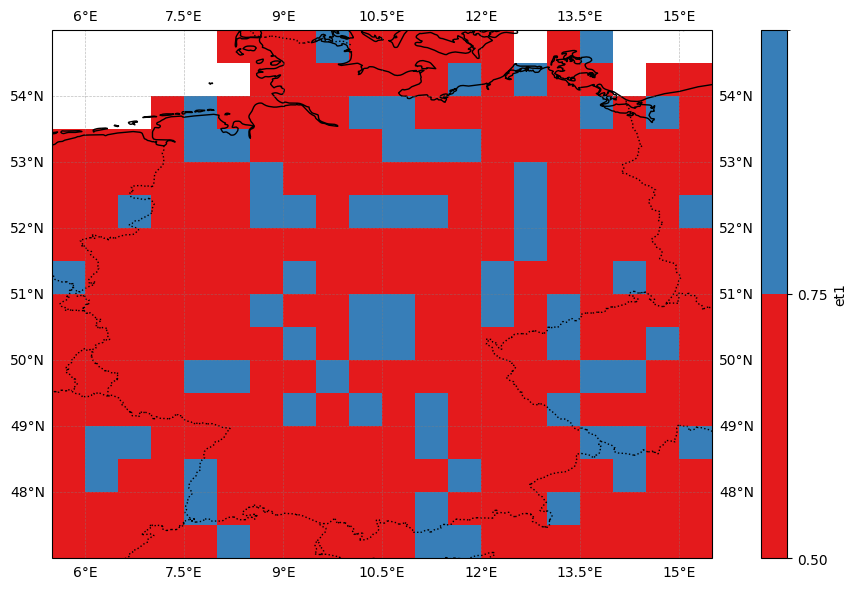

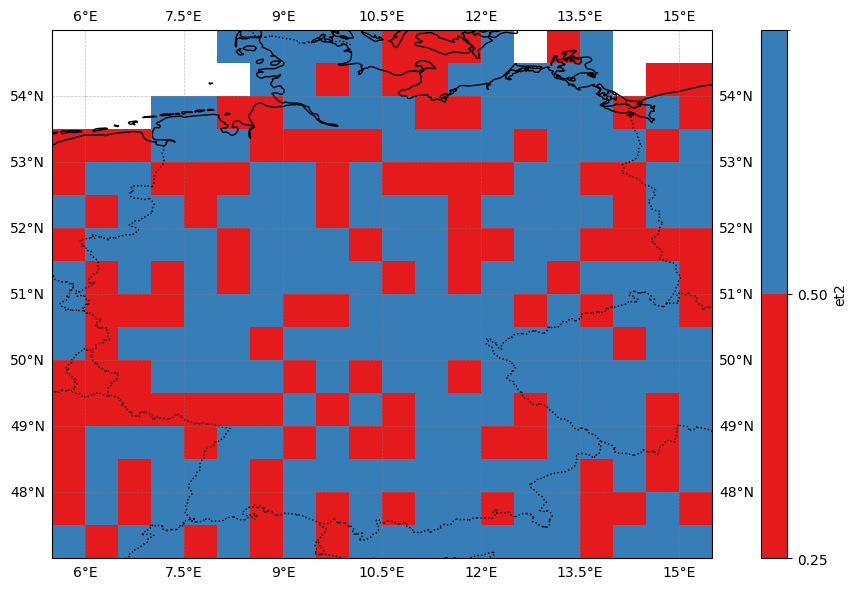

In [ ]:
# Werte für die alpha-Kategorien
paramsChoice = {    
    "c_s": [210, 420, 840],
    "alpha": [2, 4, 8],
    "gamma": [0.2, 0.5, 0.8],
    "beta": [0.4, 0.6, 0.8],
    "c_m": [1, 1.5, 2],
    "et1": [0.5, 0.75],       # du hast et_weight in zwei Variablen aufgeteilt
    "et2": [0.25, 0.5]
}

def get_cmap_and_norm(values):
    values_sorted = sorted(set(values))  # sortieren für konsistente Farben
    n = len(values_sorted)
    cmap = ListedColormap(plt.cm.Set1.colors[:n])  # n Farben aus Set1
    boundaries = values_sorted + [max(values_sorted) + 1]  # damit BoundaryNorm funktioniert
    norm = BoundaryNorm(boundaries, ncolors=n)
    return cmap, norm, values_sorted

# Loop über alle Parameter
for param, values in paramsChoice.items():
    if param not in res:  # z. B. et1, et2 könnten fehlen
        continue
    
    da = res[param]
    cmap, norm, ticks = get_cmap_and_norm(values)

    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_title(f"{param} (kategorisch)", fontsize=14)

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())

    im = da.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
    cbar = plt.colorbar(im, ax=ax, orientation="vertical", ticks=ticks)
    cbar.set_label(param)

    plt.tight_layout()
    plt.show()

In [9]:
data_path = r"/Users/rileyluck/Documents/SS_2025/ALSM/data/"
output_path = r"/Users/rileyluck/Documents/SS_2025/ALSM/output"


temperature = xr.open_mfdataset(data_path + '0_1_degree/temperature_2000_2022.nc', combine='by_coords').load()
precipitation = xr.open_mfdataset(data_path + '0_1_degree/precipitation_2000_2022.nc', combine='by_coords').load()
radiation = xr.open_mfdataset(data_path + '0_1_degree/net_radiation_2000_2022.nc', combine='by_coords').load()
ndvi = xr.open_mfdataset(data_path + '0_1_degree/ndvi_daily_2000_2022.nc', combine='by_coords').load()

data = xr.Dataset()
data['temperature'] = temperature['t2m']
data['precipitation'] = precipitation['precipitation']
data['radiation'] = radiation['nr']
data['ndvi'] = ndvi['ndvi']
data['observedRunoff'] = precipitation['precipitation']

#get rid of anythin before 2000 and after 2022
data = data.sel(time=slice('2000-03-01', '2022-12-19'))
data

<xarray.Dataset> Size: 3GB
Dimensions:         (time: 8329, lon: 106, lat: 106)
Coordinates:
  * time            (time) datetime64[ns] 67kB 2000-03-01 ... 2022-12-19
  * lon             (lon) float64 848B 4.75 4.85 4.95 5.05 ... 15.05 15.15 15.25
  * lat             (lat) float64 848B 55.25 55.15 55.05 ... 44.95 44.85 44.75
Data variables:
    temperature     (time, lat, lon) float32 374MB nan nan nan ... 273.6 273.0
    precipitation   (time, lat, lon) float64 749MB 0.0015 0.0015 ... 7.813e-06
    radiation       (time, lat, lon) float64 749MB nan nan ... -1.049e+05
    ndvi            (time, lat, lon) float64 749MB 0.0 0.0 0.0 ... 0.5928 0.0
    observedRunoff  (time, lat, lon) float64 749MB 0.0015 0.0015 ... 7.813e-06

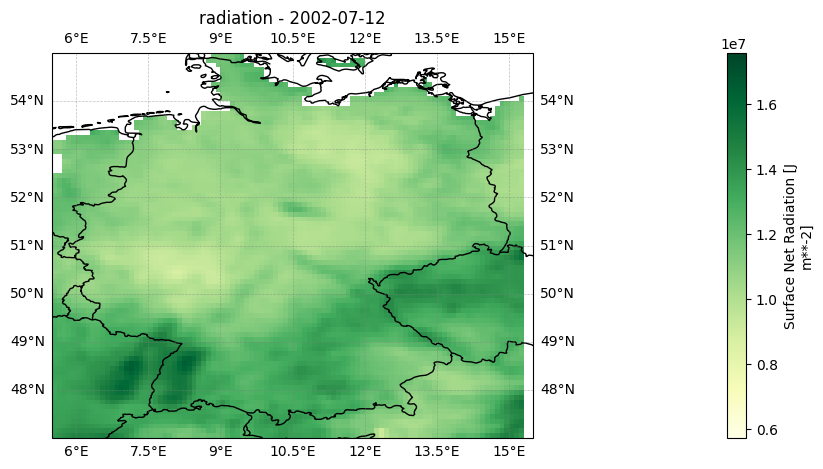

In [5]:
date = "2002-07-12"
layer = "radiation"

fig, ax = plt.subplots(1, 1, figsize=(50, 5), subplot_kw={'projection': ccrs.PlateCarree()}) 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())
data[layer].sel(time=date).plot(cmap="YlGn")
plt.title(layer + " - " + date)
plt.show()

In [6]:
paramsChoice = {    
    "c_s": [210, 420, 840],
    "alpha": [2, 4, 8],
    "gamma": [0.2, 0.5, 0.8],
    "beta": [0.4, 0.6, 0.8],
    "c_m": [1, 1.5, 2],
    "et_weight": [(0.5, 0.25), (0.75, 0.5), (0.5, 0.5)]
}

start_time = time.time()
cal = Calibrator(paramsChoice=paramsChoice, rasterData=data)
res = cal.calculate_best_params()
print(res)
apply_ufunc_duration = time.time() - start_time
print(f"calculations completed in {apply_ufunc_duration:.5f} seconds.")

/Users/rileyluck/Documents/SS_2025/ALSM/final_project/LanduseModelling/watermodelCLASS.py:26: RuntimeWarning: invalid value encountered in divide
  normalized_lai = (ndvi - lai_min) / (lai_max - lai_min)


KeyboardInterrupt: 

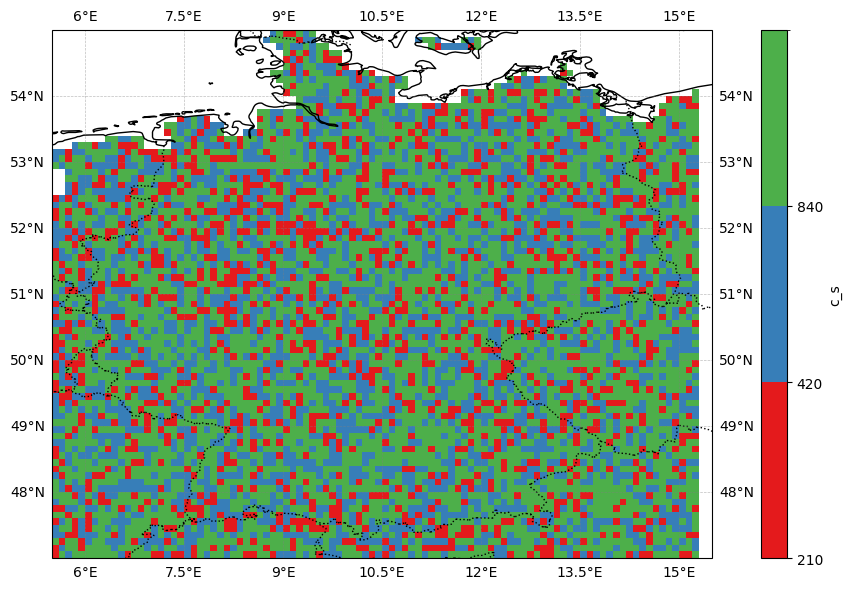

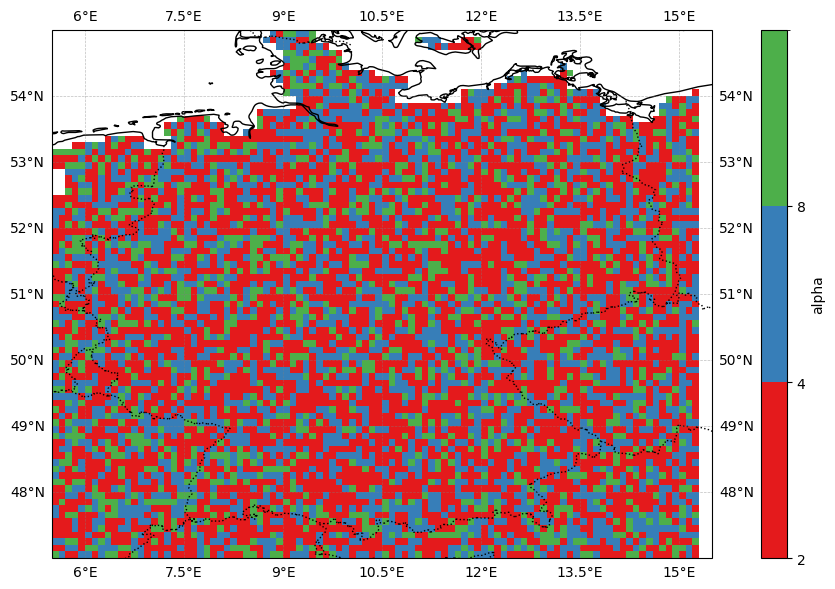

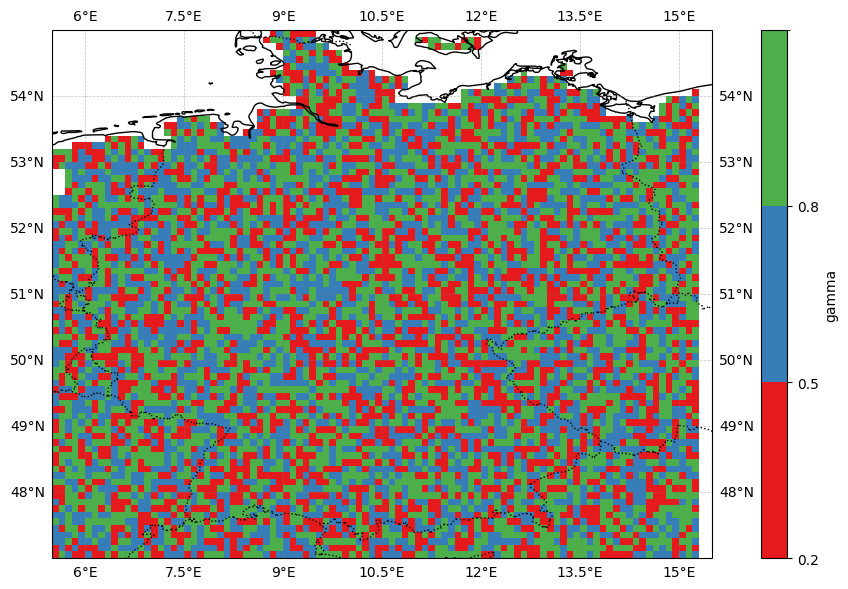

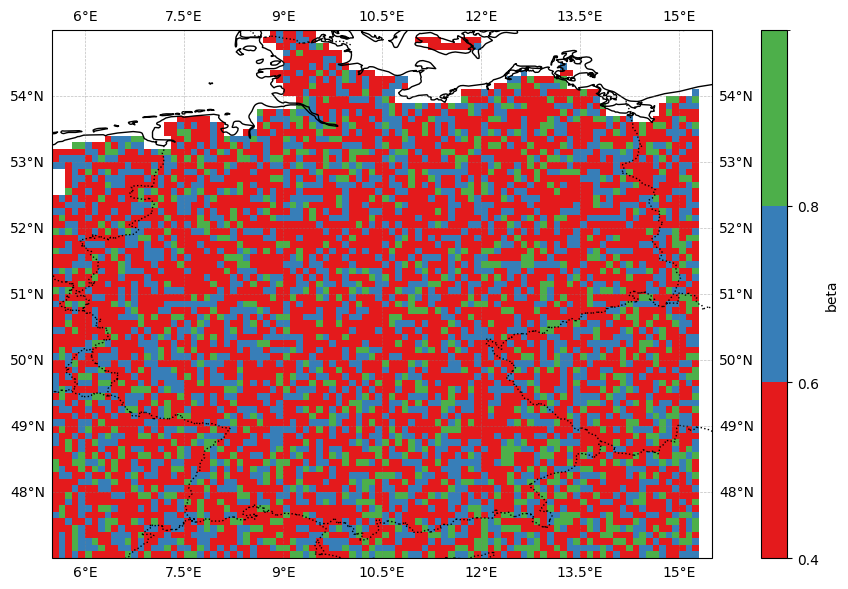

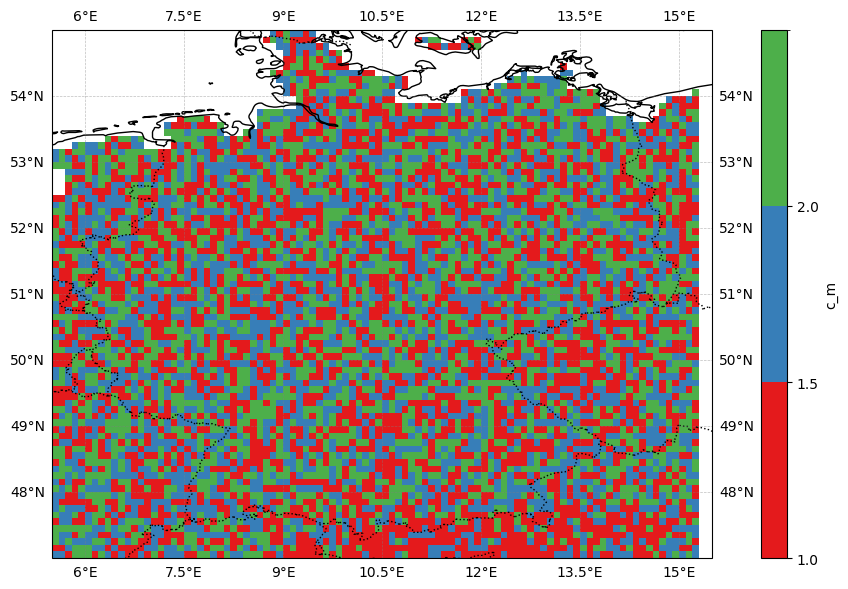

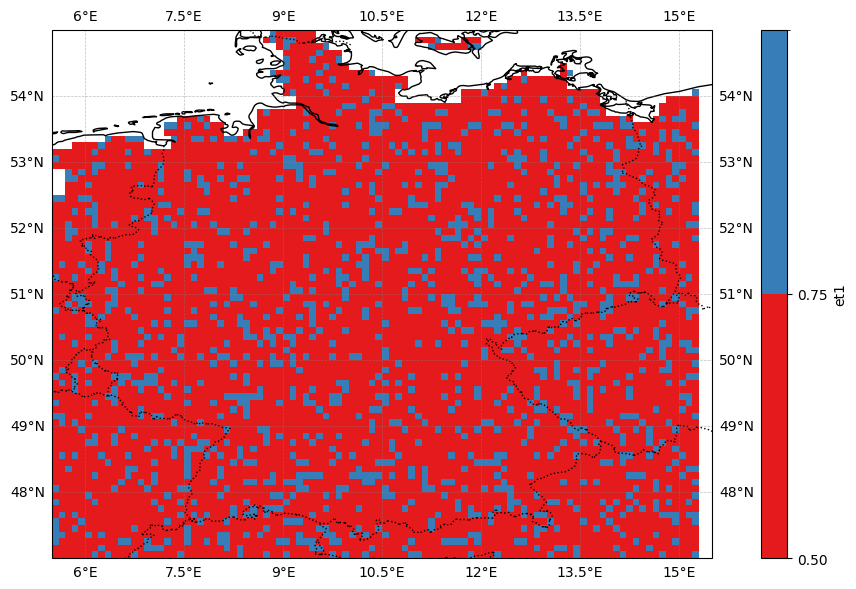

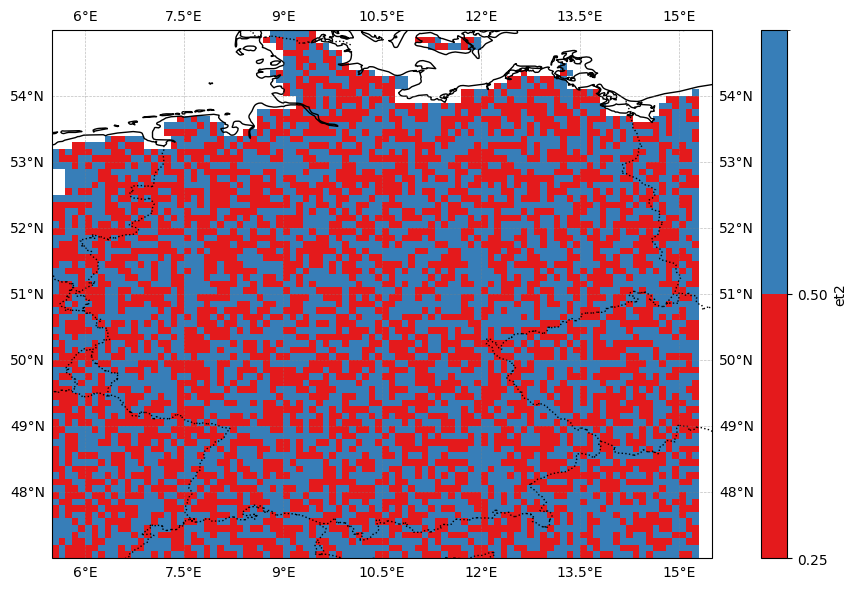

In [5]:
paramsChoice = {    
    "c_s": [210, 420, 840],
    "alpha": [2, 4, 8],
    "gamma": [0.2, 0.5, 0.8],
    "beta": [0.4, 0.6, 0.8],
    "c_m": [1, 1.5, 2],
    "et1": [0.5, 0.75],       # du hast et_weight in zwei Variablen aufgeteilt
    "et2": [0.25, 0.5]
}

def get_cmap_and_norm(values):
    values_sorted = sorted(set(values))  # sortieren für konsistente Farben
    n = len(values_sorted)
    cmap = ListedColormap(plt.cm.Set1.colors[:n])  # n Farben aus Set1
    boundaries = values_sorted + [max(values_sorted) + 1]  # damit BoundaryNorm funktioniert
    norm = BoundaryNorm(boundaries, ncolors=n)
    return cmap, norm, values_sorted

# Loop über alle Parameter
for param, values in paramsChoice.items():
    if param not in res:  # z. B. et1, et2 könnten fehlen
        continue
    
    da = res[param]
    cmap, norm, ticks = get_cmap_and_norm(values)

    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_title(f"{param} (kategorisch)", fontsize=14)

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())

    im = da.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
    cbar = plt.colorbar(im, ax=ax, orientation="vertical", ticks=ticks)
    cbar.set_label(param)

    plt.tight_layout()
    plt.show()

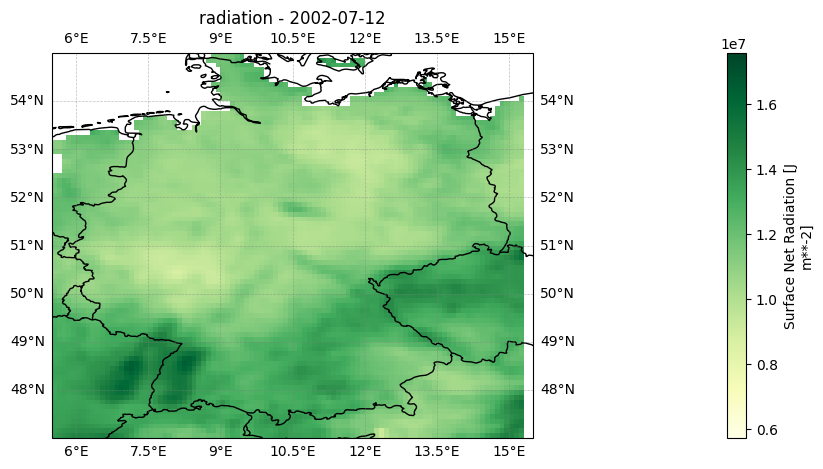

In [7]:
date = "2002-07-12"
layer = "radiation"

fig, ax = plt.subplots(1, 1, figsize=(50, 5), subplot_kw={'projection': ccrs.PlateCarree()}) 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())
data[layer].sel(time=date).plot(cmap="YlGn")
plt.title(layer + " - " + date)
plt.show()

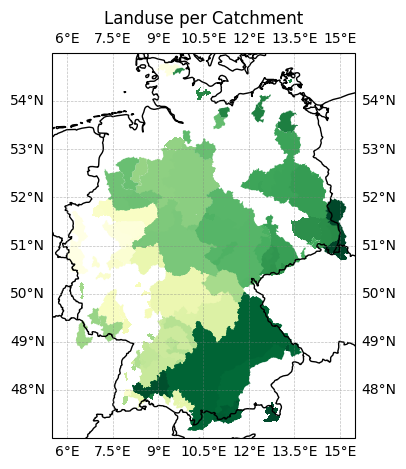

In [ ]:
gdf = gpd.read_file(DATA_DIR + "/GRDC_Catchments/gdf_landuse.gpkg")
fig, ax = plt.subplots(1, 1, figsize=(50, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Set the extent (modify if needed)
ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())

    # Plot the GeoDataFrame
gdf.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="YlGn", legend=True)

    # Set the title
plt.title("Landuse per Catchment")
plt.show()

In [27]:
gdf

,grdc_no,river,station,area,altitude,lat_org,long_org,lat_pp,long_pp,dist_km,...,quality,type,comment,source,infrastructure,agriculture,forests,wetlands,water,geometry
0,6321100.0,NIERS,GOCH,1203.0,12.02,51.6840,6.1510,51.68417,6.15083,0.0,...,Low,Automatic,Area difference 10-50% and distance <= 5 km,merit,0.215561,0.687944,0.089462,0.000000,0.007033,"MULTIPOLYGON (((6.2588 51.7171, 6.2588 51.7179..."
1,6321200.0,ROER,STAH,2105.0,32.45,51.0976,6.1042,51.09750,6.10417,0.0,...,High,Automatic,Area difference <= 5% and distance <= 5 km,merit,0.182243,0.473297,0.332139,0.003841,0.008481,"MULTIPOLYGON (((6.0396 50.7721, 6.0388 50.7721..."
2,6334270.0,SOHOLMER AU,SOHOLM,352.0,1.70,54.6997,9.0228,54.70000,9.02250,0.0,...,High,Automatic,Area difference <= 5% and distance <= 5 km,merit,0.048754,0.854805,0.088103,0.006822,0.001516,"MULTIPOLYGON (((8.9671 54.6754, 8.9671 54.6754..."
3,6334800.0,TREENE,TREIA,481.0,5.00,54.5143,9.3173,54.51417,9.31750,0.0,...,High,Automatic,Area difference <= 5% and distance <= 5 km,merit,0.047666,0.888162,0.052989,0.005421,0.005763,"MULTIPOLYGON (((9.4962 54.5737, 9.4971 54.5737..."
4,6335030.0,RUHR,HATTINGEN,4078.0,64.69,51.3997,7.1610,51.40000,7.16167,0.1,...,High,Automatic,Area difference <= 5% and distance <= 5 km,merit,0.103984,0.354998,0.532799,0.000000,0.008219,"MULTIPOLYGON (((7.1887 51.3912, 7.1887 51.3921..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,6343555.0,RAMSAUER ACHE,ILSANK,122.3,576.16,47.6200,12.9500,47.61417,12.95000,0.6,...,High,Automatic,Area difference <= 5% and distance <= 5 km,merit,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((12.9196 47.6279, 12.9196 47.62..."
151,6343560.0,SAALACH,UNTERJETTENBERG,940.6,494.40,47.6812,12.8228,47.68120,12.82290,0.0,...,High,Automatic,Area difference <= 5% and distance <= 5 km,hydrosheds,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((12.7875 47.7542, 12.8125 47.75..."
152,6357501.0,LUSATIAN NEISSE RIVER,GUBEN 2,4080.0,37.48,51.9692,14.7069,51.96917,14.70750,0.0,...,High,Automatic,Area difference <= 5% and distance <= 5 km,merit,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14.7154 51.9513, 14.7146 51.95..."
153,6357502.0,LUSATIAN NEISSE RIVER,GOERLITZ,1621.0,175.63,51.1612,14.9932,51.16040,14.99380,0.1,...,High,Automatic,Area difference <= 5% and distance <= 5 km,hydrosheds,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((14.9667 51.175, 14.975 51.175,..."


In [ ]:
data_path = DATA_DIR+ r"/GRDC_Catchments/GRDC-Daily.nc"

runoff = xr.open_mfdataset(data_path).load()

#get rid of anythin before 2000 and after 2022
runoff = runoff.sel(time=slice('2000-03-01', '2022-12-19'))
runoff

<xarray.Dataset> Size: 6MB
Dimensions:              (time: 8329, id: 174)
Coordinates:
  * time                 (time) datetime64[ns] 67kB 2000-03-01 ... 2022-12-19
  * id                   (id) int32 696B 6321100 6321200 ... 6357502 6357510
Data variables:
    runoff_mean          (time, id) float32 6MB 18.2 51.44 7.2 ... 8.46 nan nan
    area                 (id) float32 696B 1.203e+03 2.105e+03 ... 162.0
    country              (id) <U2 1kB 'DE' 'DE' 'DE' 'DE' ... 'DE' 'DE' 'DE'
    geo_x                (id) float32 696B 6.151 6.104 9.023 ... 14.99 14.94
    geo_y                (id) float32 696B 51.68 51.1 54.7 ... 51.97 51.16 51.06
    geo_z                (id) float32 696B 12.02 32.45 1.7 ... 37.48 175.6 197.2
    owneroforiginaldata  (id) <U104 72kB 'Germany - Federal Institute of Hydr...
    river_name           (id) <U21 15kB 'NIERS' 'ROER' ... 'PLIESSNITZ'
    station_name         (id) <U24 17kB 'GOCH' 'STAH' ... 'GOERLITZ' 'TAUCHRITZ'
    timezone             (id) float32 696B 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes:
    title:          Mean daily discharge (Q)
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Download from GRDC Database, 15/05/2025
    missing_value:  -999.000

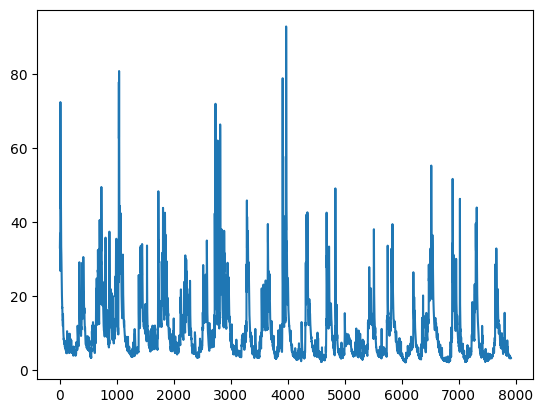

In [32]:
bentfeld_id = runoff["station_name"].values == "BENTFELD"
bentfeld_index = np.where(bentfeld_id)[0][0]

# Select only that timeseries
runoffBentfeld = runoff["runoff_mean"].isel(id=bentfeld_index)

plt.plot(runoffBentfeld)
plt.show()

In [33]:
runoffBentfeld

<xarray.DataArray 'runoff_mean' (time: 8329)> Size: 33kB
array([33.08 , 35.979, 35.444, ...,    nan,    nan,    nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 67kB 2000-03-01 2000-03-02 ... 2022-12-19
    id       int32 4B 6335082
Attributes:
    units:      m3/s
    long_name:  Mean daily discharge (Q)

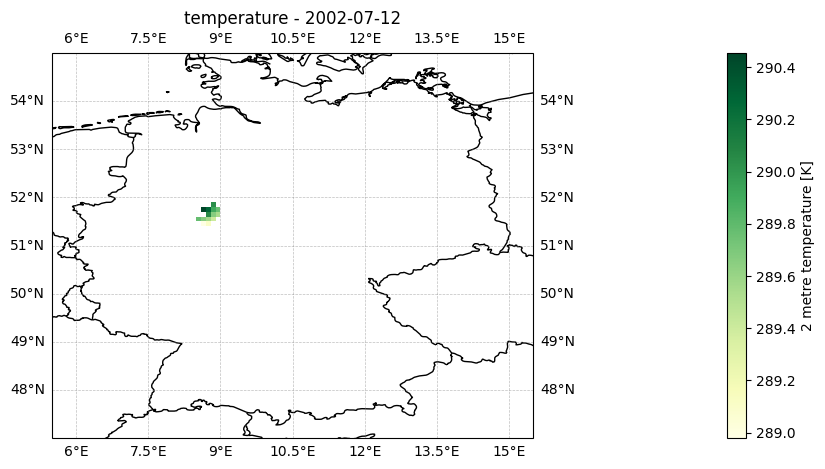

In [34]:
date = "2002-07-12"
layer = "temperature"

fig, ax = plt.subplots(1, 1, figsize=(50, 5), subplot_kw={'projection': ccrs.PlateCarree()}) 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())
data[layer].sel(time=date).plot(cmap="YlGn")
plt.title(layer + " - " + date)
plt.show()

In [35]:
data_path = DATA_DIR + r"catchment_timeseries/bentfeld/"

temperature = xr.open_dataset(data_path + '/temperature.nc').load()
precipitation = xr.open_mfdataset(data_path + '/precipitation.nc', combine='by_coords').load()
radiation = xr.open_mfdataset(data_path + '/radiation.nc', combine='by_coords').load()
ndvi = xr.open_mfdataset(data_path + '/ndvi.nc', combine='by_coords').load()

data = xr.Dataset()
data['temperature'] = temperature['t2m']
data['precipitation'] = precipitation['precipitation']
data['radiation'] = radiation['nr']
data['ndvi'] = ndvi['ndvi']
data['observedRunoff'] = runoffBentfeld.broadcast_like(radiation['nr'])

#get rid of anythin before 2000 and after 2022
data = data.sel(time=slice('2000-03-01', '2022-12-19'))
data

<xarray.Dataset> Size: 7MB
Dimensions:         (time: 8329, x: 5, y: 5)
Coordinates:
  * time            (time) datetime64[ns] 67kB 2000-03-01 ... 2022-12-19
  * x               (x) float64 40B 8.55 8.65 8.75 8.85 8.95
  * y               (y) float64 40B 51.85 51.75 51.65 51.55 51.45
    spatial_ref     int64 8B 0
    id              int32 4B 6335082
Data variables:
    temperature     (time, y, x) float32 833kB nan nan nan ... 276.1 nan nan
    precipitation   (time, y, x) float64 2MB nan nan nan ... 0.004961 nan nan
    radiation       (time, y, x) float64 2MB nan nan nan ... -2.438e+04 nan nan
    ndvi            (time, y, x) float64 2MB nan nan nan ... 0.6008 nan nan
    observedRunoff  (time, y, x) float32 833kB 33.08 33.08 33.08 ... nan nan nan

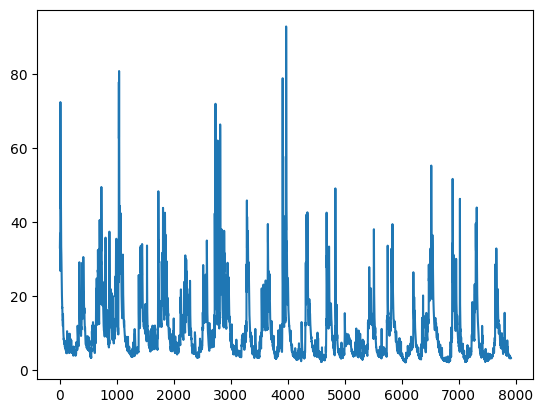

In [36]:
plt.plot(data["observedRunoff"].isel(y=1, x=1))
plt.show()

In [37]:
print(runoffBentfeld['runoff_mean'])
print(data['temperature'])

KeyError: 'runoff_mean'

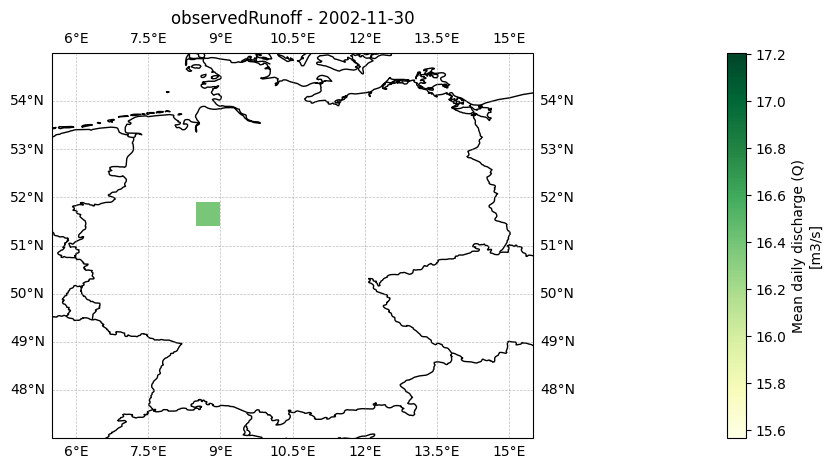

In [40]:
date = "2002-11-30"
layer = "observedRunoff"

fig, ax = plt.subplots(1, 1, figsize=(50, 5), subplot_kw={'projection': ccrs.PlateCarree()}) 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())
data[layer].sel(time=date).plot(cmap="YlGn")
plt.title(layer + " - " + date)
plt.show()

In [41]:
paramsChoice = {    
    "c_s": [210, 420, 840],
    "alpha": [2, 4, 8],
    "gamma": [0.2, 0.5, 0.8],
    "beta": [0.4, 0.6, 0.8],
    "c_m": [1, 1.5, 2],
    "et_weight": [(0.5, 0.25), (0.75, 0.5), (0.5, 0.5)]
}

start_time = time.time()
cal = Calibrator(paramsChoice=paramsChoice, rasterData=data, amountCombinations=300)
res = cal.calculate_best_params()
print(res)
apply_ufunc_duration = time.time() - start_time
print(f"calculations completed in {apply_ufunc_duration:.5f} seconds.")

<xarray.Dataset> Size: 1kB
Dimensions:      (x: 5, y: 5)
Coordinates:
  * x            (x) float64 40B 8.55 8.65 8.75 8.85 8.95
  * y            (y) float64 40B 51.85 51.75 51.65 51.55 51.45
    spatial_ref  int64 8B 0
    id           int32 4B 6335082
Data variables:
    c_s          (y, x) float64 200B nan nan nan 420.0 ... 420.0 420.0 nan nan
    alpha        (y, x) float64 200B nan nan nan 8.0 nan ... nan 4.0 8.0 nan nan
    gamma        (y, x) float64 200B nan nan nan 0.2 nan ... nan 0.2 0.2 nan nan
    beta         (y, x) float64 200B nan nan nan 0.8 nan ... nan 0.8 0.8 nan nan
    c_m          (y, x) float64 200B nan nan nan 1.0 nan ... nan 1.5 2.0 nan nan
    et1          (y, x) float64 200B nan nan nan 0.75 nan ... 0.75 0.75 nan nan
    et2          (y, x) float64 200B nan nan nan 0.5 nan ... nan 0.5 0.5 nan nan
calculations completed in 175.07374 seconds.


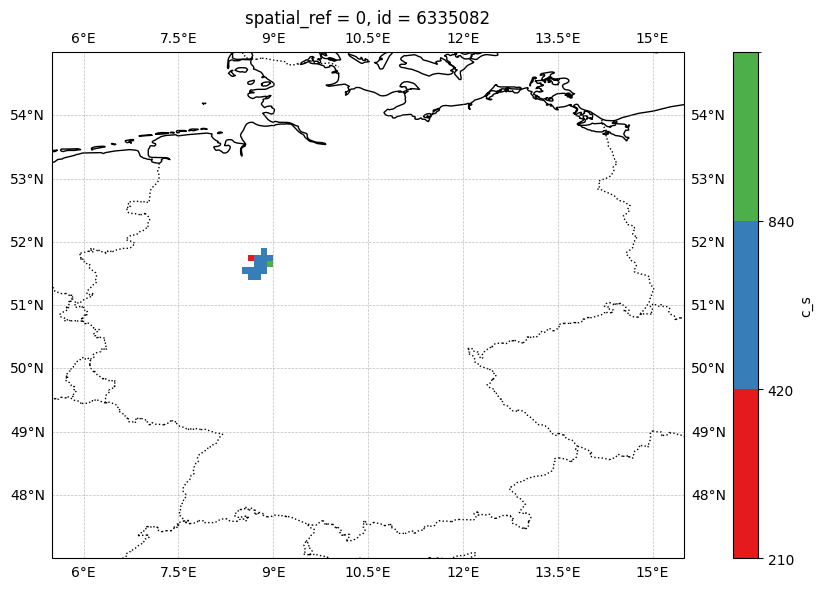

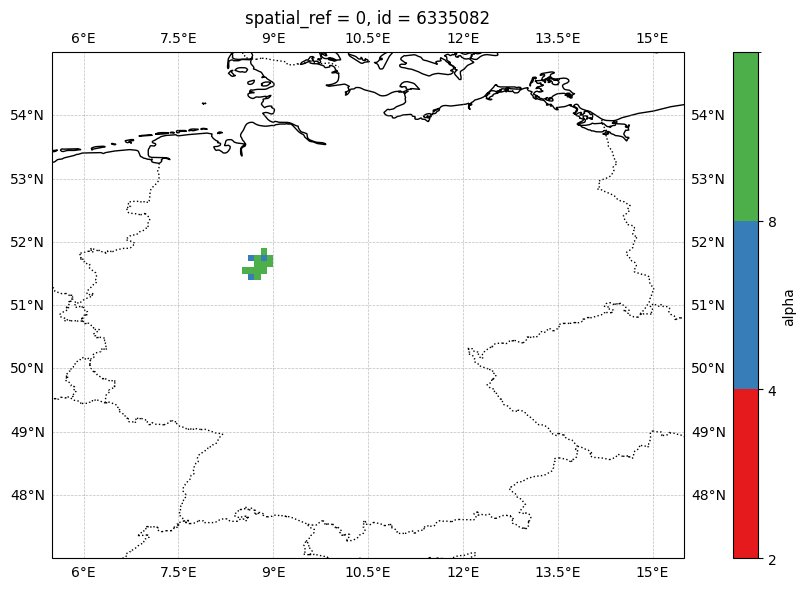

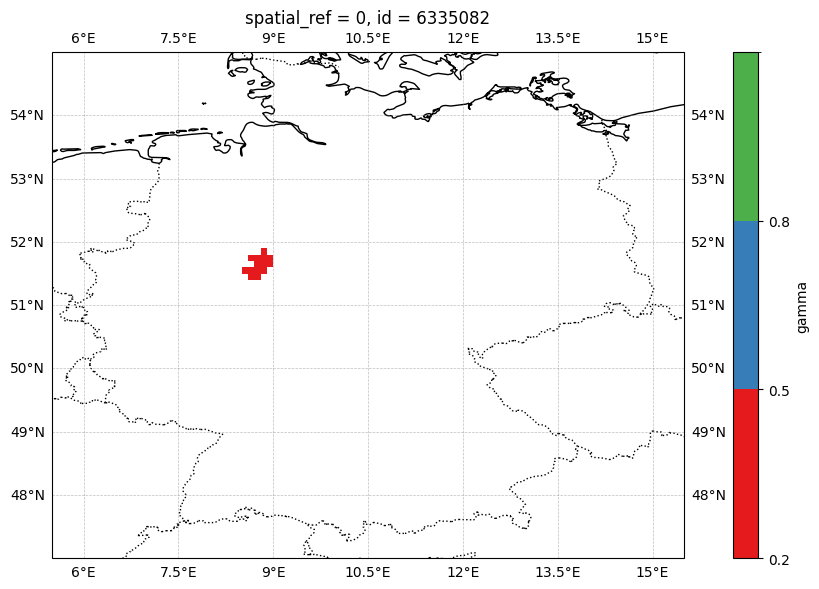

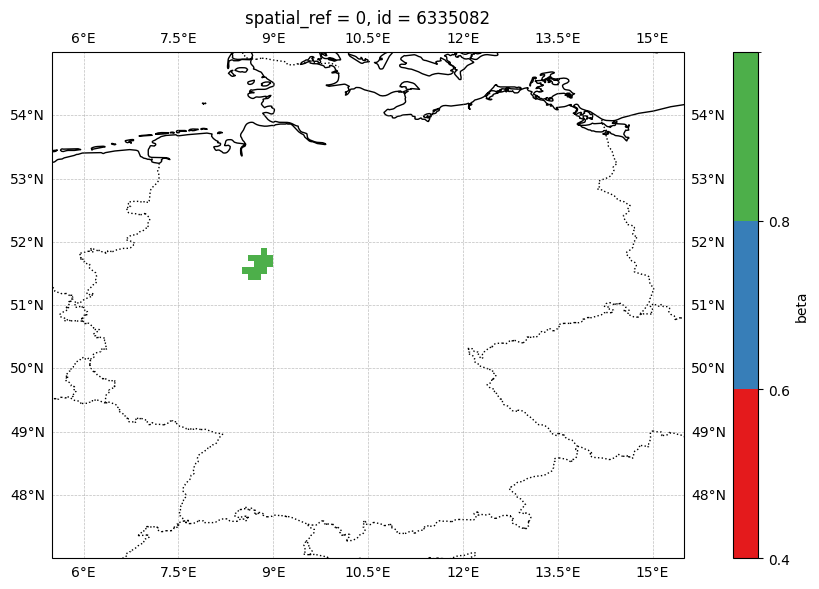

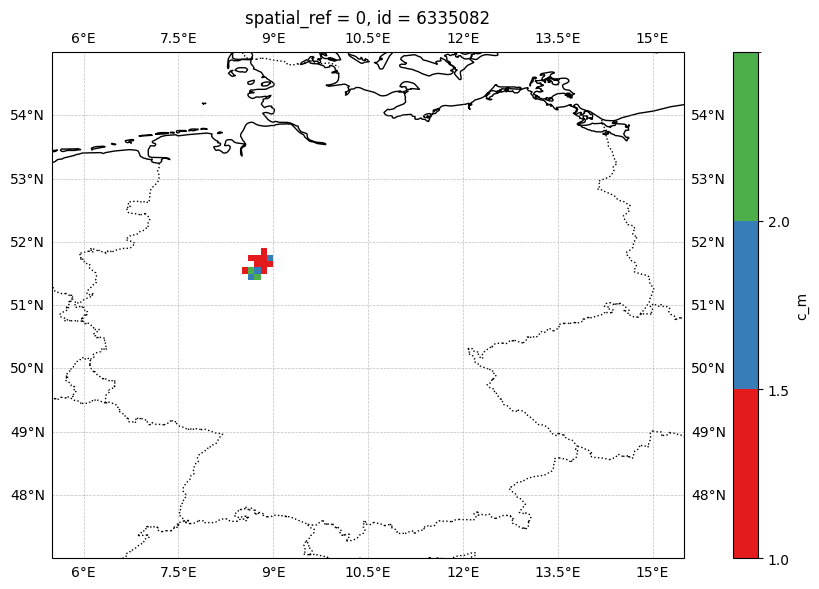

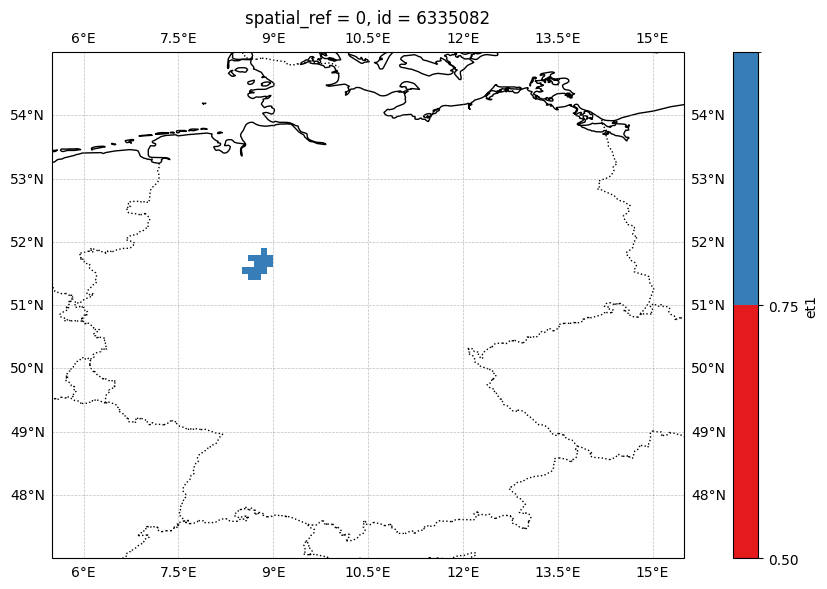

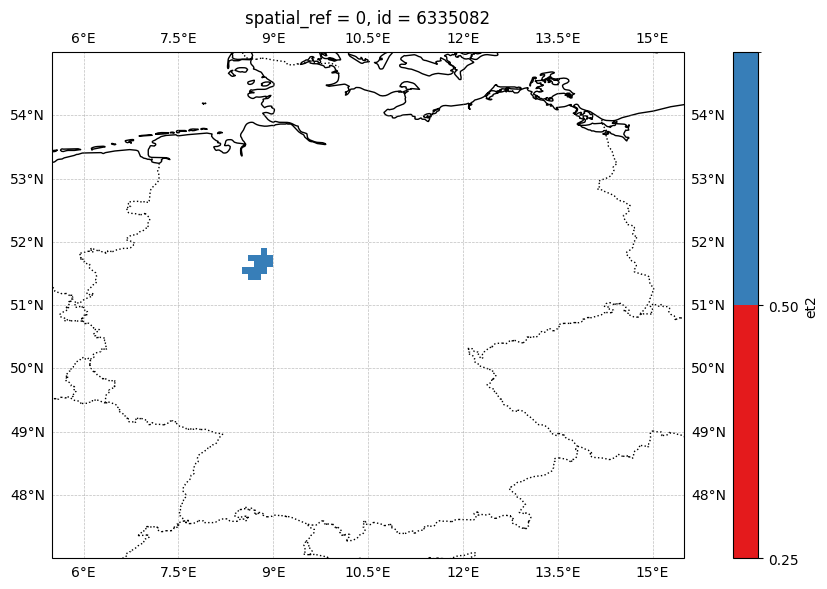

In [42]:
paramsChoice = {    
    "c_s": [210, 420, 840],
    "alpha": [2, 4, 8],
    "gamma": [0.2, 0.5, 0.8],
    "beta": [0.4, 0.6, 0.8],
    "c_m": [1, 1.5, 2],
    "et1": [0.5, 0.75],       # du hast et_weight in zwei Variablen aufgeteilt
    "et2": [0.25, 0.5]
}

def get_cmap_and_norm(values):
    values_sorted = sorted(set(values))  # sortieren für konsistente Farben
    n = len(values_sorted)
    cmap = ListedColormap(plt.cm.Set1.colors[:n])  # n Farben aus Set1
    boundaries = values_sorted + [max(values_sorted) + 1]  # damit BoundaryNorm funktioniert
    norm = BoundaryNorm(boundaries, ncolors=n)
    return cmap, norm, values_sorted

# Loop über alle Parameter
for param, values in paramsChoice.items():
    if param not in res:  # z. B. et1, et2 könnten fehlen
        continue
    
    da = res[param]
    cmap, norm, ticks = get_cmap_and_norm(values)

    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_title(f"{param} (kategorisch)", fontsize=14)

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    ax.set_extent([5.5, 15.5, 47, 55], crs=ccrs.PlateCarree())

    im = da.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
    cbar = plt.colorbar(im, ax=ax, orientation="vertical", ticks=ticks)
    cbar.set_label(param)

    plt.tight_layout()
    plt.show()